# Двумерное динамическое программирование

## Расстояние Левенштейна

Расстояние Левенштейна, или редакционное расстояние, — метрика cходства между двумя строковыми последовательностями. Чем больше расстояние, тем более различны строки. Для двух одинаковых последовательностей расстояние равно нулю. По сути, это минимальное число односимвольных преобразований (удаления, вставки или замены), необходимых, чтобы превратить одну последовательность в другую

Например, LEV(’БИБА’, ‘БОБА’) = 1, так как потребуется провести одну замену ‘И’ на ‘О’

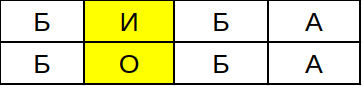

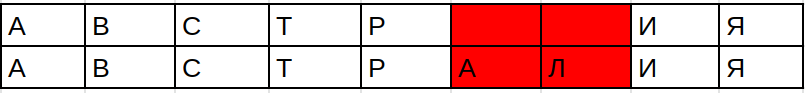

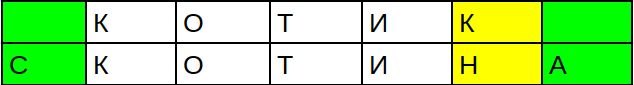

Расстояние Левенштейна активно используется для исправления ошибок в словах, поиска дубликатов текстов, сравнения геномов и прочих полезных операций с символьными последовательностями.

In [1]:
def levenstein(str_1, str_2):
    n, m = len(str_1), len(str_2)
    if n > m:
        str_1, str_2 = str_2, str_1
        n, m = m, n

    current_row = range(n + 1)
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if str_1[j - 1] != str_2[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [2]:
levenstein('abcdef', 'abcdef')

0

In [3]:
levenstein('1abcdef', 'abcdef')

1

In [4]:
levenstein('1qwe425817sjiqjbcdef', 'abcdef')

15

## Поиск наибольшей общей подпоследовательности

Для двух данных строк найти такую строку наибольшей длины, которая была бы подпоследовательностью каждой из них. 

Обратите внимание! Подпоследовательность отличается от подстроки. Например, если есть исходная последовательность «ABCDEF», то «ACE» будет подпоследовательностью, но не подстрокой, а «ABC» будет как подпоследовательностью, так и подстрокой.

Начнём решение задачи с рассмотрения последних символов данных строк $a_{n-1}$ и $b_{m-1}$. Если эти символы совпадают, то они обязательно войдут последними символами и в наибольшую общую подпоследовательность данных строк. Таким образом, можно свести задачу нахождения наибольшей общей подпоследовательности для строк $A = a_{0}a_{1}a_{2}...a_{n-2}a_{n-1}$ и $B = b_{0}b_{1}b_{2}...b_{m-2}b_{m-1}$ к задаче нахождения наибольшей общей подпоследовательности для строк, полученных отбрасыванием от данных строк последнего символа, то есть для $a_{0}a_{1}a_{2}...a_{n-2}$ и $b_{0}b_{1}b_{2}...b_{m-2}$. Для того, чтобы получить ответ для исходных строк добавим к ответу для «укороченных» строк последние (равные) символы исходных строк ($a_{n-1}$ или $b_{m-1}$) и получим ответ для исходных строк.

Рассмотрим случай когда последние символы исходных строк не совпадают. Если это так, то эти символы ($a_{n-1}$ и $b_{m-1}$) не могут одновременно входить в наибольшую общую подпоследовательность, поэтому можно один из них отбросить. Тогда задача сводится к нахождению наибольшей общей подпоследовательности для одного из двух случаев - для строк $a_{0}a_{1}a_{2}...a_{n-2}$ и $b_{0}b_{1}b_{2}...b_{m-2}b_{m-1}$ или для строк $a_{0}a_{1}a_{2}...a_{n-2}a_{n-1}$ и $b_{0}b_{1}b_{2}...b_{m-2}$.

Мы свели задачу нахождения наибольшей общей подпоследовательности двух строк к меньшей задаче - нахождения наибольшей общей подпоследовательности для строк, полученных отбрасыванием последних символов от исходных строк, то есть для префиксов исходных строк. Воспользуемся принципом построения решения при помощи динамического программирования.

Обозначим за $F(i, j)$ длину наибольшей общей подпоследовательности для $A^{'} = A[:i]$ и $B^{'} = B[:j]$. Запишем рекуррентные соотношения. Если последние символы рассматриваемых строк $A^{'}$ и $B^{'}$ совпадают, т. е. $a_{i-1} = b_{j-1}$, то $F(i, j) = F(i-1, j-1) + 1$.
Если же последние символы рассматриваемых строк $A^{'}$ и $B^{'}$ не совпадают, то рассматриваем случаи $F(i-1, j)$ и $F(i, j-1)$. Для этого случае реккурентное соотношение имеет вид: $F(i, j) = max(F(i-1, j), F(i, j-1))$.

Зададим начальные значения функции $F$: если одна из строк - пустая, то общая подпоследовательность также пустая, то есть имеет длину 0: $F(0, j) = F(i, 0) = 0$. Далее создаём двумерный массив $(n+1)(m+1)$ и заполняем его по реккурентным соотношениям.

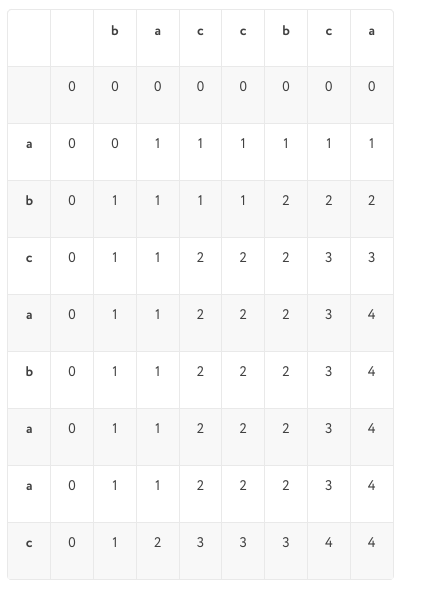

In [6]:
import numpy as np
np.zeros((5 + 1, 6 + 1)).tolist()

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [7]:
def largest_common_subsequence(a, b):
    import numpy as np
    n = len(a)
    m = len(b)
    F = np.zeros((n + 1, m + 1)).tolist()

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i - 1] == b[j - 1]:
                F[i][j] = F[i - 1][j - 1] + 1 
            else: 
                F[i][j] = max(F[i - 1][j], F[i][j - 1]) 
    print(F[n][m])
    return F

In [8]:
A = 'abcabaac'
B = 'baccbca'
F = largest_common_subsequence(A, B)

4.0


In [9]:
A = ''
B = 'baccbca'
F = largest_common_subsequence(A, B)

0.0


In [10]:
A = 'baccbcare6t7t8y8sq8912345561njrt7'
B = 'baccbca123445abnjrtru7'
F = largest_common_subsequence(A, B)

17.0


А как найти саму наибольшую общую подпоследовательность?

Для этого выполним «обратный проход» по массиву $F$ начиная с последнего элемента. В каждой рассматриваемой ячейке $F[i][j]$ выясним, как было получено значение в этой ячейке. Это зависит от последних символов рассматриваемых префиксов. Если $a_{i-1} = b_{j-1}$, то тогда ответ для элемента $F[i][j]$ получен из $F[i-1][j-1]$ добавлением 1, поэтому перейдем к элементу $F[i-1][j-1]$, а к ответу добавим символ $a_{i-1} = b_{j-1}$. В противном случае нужно перейти к тому элементу $F[i-1][j]$ или $F[i][j-1]$, значение в котором совпадает со значением $F[i][j]$.  

In [9]:
A = 'abcabaac'
B = 'baccbca'

In [10]:
ans = []
i = len(a)
j = len(b)
while i > 0 and j > 0:
    if a[i-1] == b[j-1]:
        ans.append(a[i-1])
        i -= 1
        j -= 1
    elif F[i-1][j] == F[i][j]:
        i -= 1 
    else: 
        j -= 1 
ans = ans[::-1]
print(ans)

['b', 'c', 'b', 'a']


## Поиск наибольшей возрастающей подпоследовательности

Первый способ — отсортируем последовательность в порядке неубывания, удалим из нее повторяющиеся элементы (то есть получим строго возрастающую последовательность $B$ из элементов $b_0,b_1,..,b_{m-1}$. Теперь для последовательностей $A$ и $B$ найдем наибольшую общую подпоследовательность. Понятно, что эта подпоследовательность будет подпоследовательностью $A$, будет монотонно возрастать и будет иметь наибольшую длину из всех таких последовательностей. Сложность такого алгоритма будет $\mathcal{O}(n^2)$.

Второй способ решения - при помощи динамического программирования. Обозначим через $F(i)$ длину наибольшей возрастающей подпоследовательности, последним элементом которой будет элемент $a_i$. Тогда для вычисления значения $F(i)$ рассмотрим предпоследний элемент этой последовательности. Пусть это элемент $a_j$, тогда $j<i$ и $a_j<a_i$. Длина наибольшей возрастающей подпоследовательности, заканчивающейся $a_j$ есть F(i), значит, необходимо найти такое подходящее $j$, что $F(j)$ будет наибольшим. Итак, $F(i)=1+\min\limits_{j<i, a_j<a_i}F(j)$. Если же ни одного такого подходящего $j$ нет (то есть все $a_j\ge a_i$ при $j<i$), то $F(i)=1$.

Соответствующая программа вычисления значений функции  будет выглядеть так:

In [13]:
a = [2,1,0,-1,100,200]
F = [0] * len(a)
for i in range(len(a)):
    for j in range(i):
        if a[j] < a[i]: #and F[j] > F[i]:
            F[i] = F[j]
    F[i] += 1
print(F[i])

3
